# ECS759P Lab6 Part 1: Automated Classification of Data

This lab focuses on data classification using decision trees and more particularly the ID3 algorithm.

## Problem definition

You are a data analyst in a company manufacturing and selling a wide range of tires. The research team came up with a new kind of rubber that improves the safety of the vehicles as well as the durability. However, its production is quite expensive and they are not sure whether it is profitable to create a new product or not. While discussing, you understand that this rubber is only useful for people who tend to drive aggressively. You decide then to use a part of your database containing your clients (which are car-making companies) and their products and label them to see if the new tires would fit. Your assumption is that some cars are meant to be driven more aggressively than others.

## Data

Run the following cell to load the data in the variable named `all_data`


In [ ]:
import numpy as np
all_data = np.array([["A", True, 	"2"	,False, 	"3",	"2", "Diesel", False],
["B", True, 	"4"	,False, 	"3",	"4", "Petrol", True],
["A", True, 	"2"	,True, 	"3",	"2", "Petrol", True],
["C", False, 	"2"	,True, 	"3",	"4", "Petrol", False],
["B", False, 	"4"	,False, 	"5",	"4", "Diesel", True],
["A", True, 	"2"	,False, 	"3",	"2", "Diesel", False],
["B", True, 	"4"	,True, 	"5",	"4", "Petrol", True],
["B", False, 	"2"	,False, 	"5",	"2", "Diesel", False],
["A", True, 	"4"	,True, 	"5",	"4", "Petrol", False],
["C", False, 	"4"	,True, 	"3",	"2", "Diesel", True],
["A", False, 	"2"	,False, 	"5",	"2", "Petrol", True],
["C", False, 	"2"	,False, 	"3",	"4", "Diesel", True],
["B", True, 	"4"	,True, 	"5",	"4", "Petrol", False],
["B", True, 	"2"	,True, 	"5",	"2", "Diesel", True],
["C", False, 	"4"	,False, 	"3",	"4", "Petrol", False],
["B", True, 	"2"	,False, 	"5",	"4", "Diesel", False],
["A", True, 	"4"	,False, 	"5",	"2", "Diesel", False],
["B", False, 	"2"	,False, 	"3",	"2", "Petrol", False],
["B", True, 	"4"	,False, 	"3",	"2", "Petrol", True],
["C", True, 	"2"	,False, 	"5",	"4", "Diesel", False],
["A", False, 	"2"	,False, 	"5",	"4", "Diesel", True],
["B", True, 	"2"	,True, 	"3",	"4", "Petrol", True],
["C", True, 	"2"	,False, 	"5",	"2", "Diesel", False],
["C", True, 	"2"	,True, 	"5",	"2", "Petrol", False],
["A", False, 	"2"	,False, 	"3",	"4", "Diesel", True],
["A", True, 	"2"	,True, 	"5",	"2", "Petrol", False],
["B", True, 	"2"	,True, 	"5",	"4", "Petrol", True],
["C", True, 	"4"	,False, 	"3",	"4", "Petrol", False],
["A", False, 	"2"	,False, 	"3",	"2", "Diesel", True],
["A", True, 	"4"	,True, 	"5",	"2", "Petrol", False],
["C", True, 	"4"	,False, 	"5",	"2", "Diesel", True],
["B", False, 	"2"	,True, 	"3",	"4", "Petrol", True],
["B", True, 	"4"	,True, 	"5",	"2", "Petrol", False],
["C", False, 	"4"	,True, 	"3",	"4", "Petrol", True],
["B", False, 	"2"	,True, 	"5",	"2", "Diesel", False],
["B", False, 	"4"	,False, 	"5",	"4", "Petrol", True],
["C", False, 	"2"	,True, 	"3",	"4", "Diesel", True],
["A", False, 	"4"	,True, 	"5",	"2", "Diesel", True],
["C", True, 	"2"	,False, 	"3",	"2", "Petrol", False],
["A", False, 	"2"	,False, 	"3",	"2", "Petrol", True]])

If you want a nice visualisation you can use pandas:

In [ ]:
import pandas as pd

pandas_dataframe = pd.DataFrame(data=all_data, index=["product_{}".format(i) for i in range(1,41)], columns=["Brand", "Sport", "Driving wheel", "Large trunk", "Doors", "Seats", "Motor", "Label"])
pandas_dataframe

,Brand,Sport,Driving wheel,Large trunk,Doors,Seats,Motor,Label
product_1,A,True,2,False,3,2,Diesel,False
product_2,B,True,4,False,3,4,Petrol,True
product_3,A,True,2,True,3,2,Petrol,True
product_4,C,False,2,True,3,4,Petrol,False
product_5,B,False,4,False,5,4,Diesel,True
product_6,A,True,2,False,3,2,Diesel,False
product_7,B,True,4,True,5,4,Petrol,True
product_8,B,False,2,False,5,2,Diesel,False
product_9,A,True,4,True,5,4,Petrol,False
product_10,C,False,4,True,3,2,Diesel,True


Let's try to implement the ID3 algorithm that would allow to carry out classification. You have a lot of different ways to do so, but here are the most important steps you might want to remember in general:
*   Compute the current total entropy
*   Get the number of categories for a given attribute
*   Compute the entropy for each category of a given attribute
*   Count the number of occurrences of each label for a given value of an attribute
*   Remove the instances (rows) that are perfectly classified
*   Remove the attributes already used
*   Keep track of the *questions* asked to discriminate the data



1. For the next steps of this lab, we are going to use the first half of the data (product 1 to 20) as the training set.

**Q. By filling the gaps below, implement a function that expects a dataframe and a label header as the input and returns the entropy value. Validation: You should obtain 0.99277 as the entropy value for the specified training dataframe.**

In [ ]:
import math
import warnings
warnings.filterwarnings('ignore')

def get_entropy(df, label): # calculate total entropy
  entropy = 0
  # TO DO
  classes = df[label].unique()  # Unique labels
  for cls in classes:
      e_frac = df[label].value_counts()[cls]/len(df[label])
      entropy += -e_frac*math.log2(e_frac)
  return entropy

print(get_entropy(pandas_dataframe.iloc[:20], 'Label'))


0.9927744539878083


2. Next, we are going to implement a function to calculate the information gain for a given feature.

**Q. By filling the gap below, complete the following function that expects a dataframe, a feature and the label as inputs and returns the information gain. Hint: You might want to call the function that you implemented above. Validation: You should obtain 0.007299 as the information gain for the feature 'Motor', with the training dataframe as the input.**

In [ ]:
def information_gain(df, feature, label): # calculate information gain for the considered "feature"
  info = 0
  # TO DO
  for i in df[feature].unique():
    df_att = df[df[feature]==i]
    entropy_i = get_entropy(df_att, label)
    info += len(df_att)*entropy_i/len(df)
  total_entropy = get_entropy(df, label)
  gain = total_entropy - info
  return gain

print(information_gain(pandas_dataframe.iloc[:20], 'Motor', 'Label'))

0.00729915676047399


3. Now, we are going to find the best feature (the one having the highest information gain) to expand the tree.

**Q. Bu filling the gaps below, complete the following function that returns the best feature and the corresponding information gain value. Hint: You might want to call the function that you implemented above. Validation: You should find 'Brand' as the best feature and 0.02856 as its information gain, with the training dataframe as the input.**

In [ ]:
def get_best_feature(df, label):  # select best feature, the one having the highest gain
  # TO DO
  f_gain = {}
  features = df.columns.tolist()
  features.remove(label)
  for k in features:
    f_gain[k] = information_gain(df, k, label)
  best_feature = max(f_gain, key=f_gain.get)
  gain = max(f_gain.values()) # return the feature with the highest gain and the corresponding gain value
  return best_feature, gain

print(get_best_feature(pandas_dataframe.iloc[:20], 'Label'))

('Brand', 0.028563828230594224)


The next step is to construct the decision tree using the ID3 algorithm. In order to save time, we provide the following functions. Compare this implementation with your understanding of the ID3 algorithm.

In [ ]:
def get_subdf(df, node, value):   # get the sub dataframe at a particular node, based on a feature value
  return df[df[node] == value].reset_index(drop=True)

def buildID3(df, tree=None, label=None):
  if label == None:
    label = df.keys()[-1]   # assign the last column as the label if not explicitly specified
  node, _ = get_best_feature(df, label)
  if tree is None:    # initialize the tree using dict
    tree={}
    tree[node] = {}
  unique_vals = df[node].unique()
  for val in unique_vals:
    subdf = get_subdf(df, node, val)
    cls, counts = np.unique(subdf[label],return_counts=True)  # get the label and the counts of unique values
    dup_subdf = subdf.drop(label, axis=1)   # to check if duplicate rows occur in the sub database, once 'Label' column in not considered
    dup_subdf.drop_duplicates(keep=False, inplace=True) # if we end up with a sub database having duplicate rows without considering the label, we must terminate. Otherwise the recursive loop runs forever
    if len(counts)==1 or dup_subdf.empty: # these 2 conditions result in an end leaf
      tree[node][val] = cls[0]
    else:
      tree[node][val] = buildID3(subdf) # recursively call the function to expand the tree
  return tree


We can now train the decision tree using our training data and pretty-print the tree in JSON format.

In [ ]:
import json

train_df = pandas_dataframe.iloc[:20]   # only select first 20 instances for training
t = buildID3(train_df)
print(json.dumps(t, sort_keys=True, indent=4))  # for pretty-printing

{
    "Brand": {
        "A": {
            "Motor": {
                "Diesel": "False",
                "Petrol": {
                    "Driving wheel": {
                        "2": "True",
                        "4": "False"
                    }
                }
            }
        },
        "B": {
            "Driving wheel": {
                "2": {
                    "Large trunk": {
                        "False": "False",
                        "True": "True"
                    }
                },
                "4": {
                    "Large trunk": {
                        "False": "True",
                        "True": "False"
                    }
                }
            }
        },
        "C": {
            "Motor": {
                "Diesel": {
                    "Sport": {
                        "False": "True",
                        "True": "False"
                    }
                },
                "Petrol": "False"
            }
   

4. Draw the decision tree on a paper based on the output above.

5. We want to evaluate the training and test accuracies for the decision tree that we implemented above. The function below can be used to recursively traverse the tree and reach a leaf node, which will be the prediction. Think about how this function works. The decision tree that you drew on paper might help.

**Q. By filling the gaps below, call this function and obtain the accuracies for the training set (product 1 to 20) and the test set (product 21 to 40).**

In [ ]:
def evaluate_model(df_test, tree):
  def walk(row, node):
    for key, item in node.items():
          val = row[key]
          new_item = item[val]
          if type(new_item) is dict:
            return walk(row, new_item)  # recursively traverse the tree
          else:
            return new_item
  predictions = []  # predictions made by traversing the tree
  for index, row in df_test.iterrows():
    predictions.append(walk(row, tree))
  df_test['Predictions'] = predictions
  df_test['Correctly predicted'] = np.where(df_test['Label'] == df_test['Predictions'], True, False)
  accuracy = df_test['Correctly predicted'].sum()/len(df_test)
  return df_test, accuracy

# TO DO
train_data = pandas_dataframe.iloc[:20]
test_data = pandas_dataframe.iloc[20:]
df_pred, accuracy = evaluate_model(test_data, t)
print('Test accuracy is {}%'.format(accuracy*100))
display(df_pred)

# Similarly to obtain training accuracy
df_pred, accuracy = evaluate_model(train_data, t)
print('Training accuracy is {}%'.format(accuracy*100))  # This yields 95% accuracy
display(df_pred)

Test accuracy is 60.0%


,Brand,Sport,Driving wheel,Large trunk,Doors,Seats,Motor,Label,Predictions,Correctly predicted
product_21,A,False,2,False,5,4,Diesel,True,False,False
product_22,B,True,2,True,3,4,Petrol,True,True,True
product_23,C,True,2,False,5,2,Diesel,False,False,True
product_24,C,True,2,True,5,2,Petrol,False,False,True
product_25,A,False,2,False,3,4,Diesel,True,False,False
product_26,A,True,2,True,5,2,Petrol,False,True,False
product_27,B,True,2,True,5,4,Petrol,True,True,True
product_28,C,True,4,False,3,4,Petrol,False,False,True
product_29,A,False,2,False,3,2,Diesel,True,False,False
product_30,A,True,4,True,5,2,Petrol,False,False,True


Training accuracy is 95.0%


,Brand,Sport,Driving wheel,Large trunk,Doors,Seats,Motor,Label,Predictions,Correctly predicted
product_1,A,True,2,False,3,2,Diesel,False,False,True
product_2,B,True,4,False,3,4,Petrol,True,True,True
product_3,A,True,2,True,3,2,Petrol,True,True,True
product_4,C,False,2,True,3,4,Petrol,False,False,True
product_5,B,False,4,False,5,4,Diesel,True,True,True
product_6,A,True,2,False,3,2,Diesel,False,False,True
product_7,B,True,4,True,5,4,Petrol,True,False,False
product_8,B,False,2,False,5,2,Diesel,False,False,True
product_9,A,True,4,True,5,4,Petrol,False,False,True
product_10,C,False,4,True,3,2,Diesel,True,True,True


6. Now, let's imagine that you also have continuous data as attributes -- say the price of each car, how would you implement it? Just think about it (you don't need to code), i.e how would you implement the threshold choice?

## Using already existing libraries
As you can guess, although the principle is quite simple, implementing a classification tree coping with a wide range of data is not straightforward. Fortunately, we can use an already existing implementation. Note that **scikit learn** does not support categorical data.

We are going to the sklearn implementation of the Decision Tree algorithm (https://scikit-learn.org/stable/modules/tree.html).

**Q. By filling the gaps below, split *all_data* into *train_set*, *train_labels*, *test_set* and *test_labels*. Use can use the `train_test_split` function from Scikit Learn. Transform the non-numerical labels to numerical labels. Use can use the `LabelEncoder` class from Scikit Learn. Remember that the column corresponding to labels should not be part of the features. Then create an [DecisionTreeClassifier(criterion="entropy")](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) similar to the ID3 algorithm. Train it on the *train_set* and compute the accuracy on the *test_set*.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

features = ["Brand", "Sport", "Driving wheel", "Large trunk", "Doors", "Seats", "Motor", "Label"]

# TO DO
for col in range(all_data.shape[1]):
  try:
    all_data[:,col].astype(np.int)
  except:
    le = preprocessing.LabelEncoder()
    all_data[:,col] = le.fit_transform(all_data[:,col])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(features[col])
    print(le_name_mapping)

all_data = np.array(all_data, dtype=float)
train_set, test_set, train_labels, test_labels = train_test_split(all_data[:,:-1], all_data[:,-1], train_size=20, shuffle=False)
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(train_set, train_labels, check_input=True)
preds = classifier.predict(test_set)
accuracy = accuracy_score(test_labels, preds)
print('Test accuracy is {}%'.format(accuracy*100))

Brand
{'A': 0, 'B': 1, 'C': 2}
Sport
{'False': 0, 'True': 1}
Large trunk
{'False': 0, 'True': 1}
Motor
{'Diesel': 0, 'Petrol': 1}
Label
{'False': 0, 'True': 1}
Test accuracy is 50.0%


9. Print out and discuss the new decision tree.


[Text(0.5357142857142857, 0.9166666666666666, 'x[2] <= 3.0\nentropy = 0.993\nsamples = 20\nvalue = [11, 9]'),
 Text(0.35714285714285715, 0.75, 'x[3] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(0.21428571428571427, 0.5833333333333334, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.14285714285714285, 0.4166666666666667, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.07142857142857142, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21428571428571427, 0.25, 'x[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.14285714285714285, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2857142857142857, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.4166666666666667, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5, 0.5833333333333334, 'x[5] <= 3.0\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.42857142857142855, 0

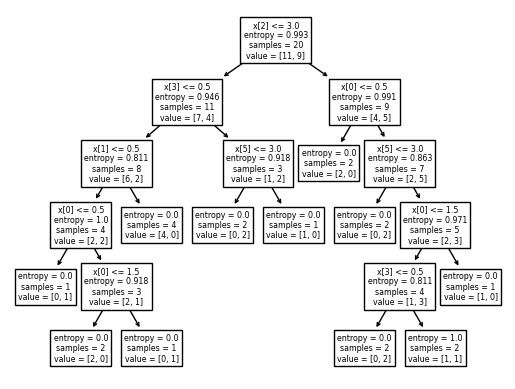

In [ ]:
from sklearn.tree import plot_tree
plot_tree(classifier)

In [ ]:
from sklearn.tree import export_text
print(export_text(classifier, feature_names=["Brand", "Sport", "Driving wheel", "Large trunk", "Doors", "Seats", "Motor"]))

|--- Driving wheel <= 3.00
|   |--- Large trunk <= 0.50
|   |   |--- Sport <= 0.50
|   |   |   |--- Brand <= 0.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- Brand >  0.50
|   |   |   |   |--- Brand <= 1.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Brand >  1.50
|   |   |   |   |   |--- class: 1.0
|   |   |--- Sport >  0.50
|   |   |   |--- class: 0.0
|   |--- Large trunk >  0.50
|   |   |--- Seats <= 3.00
|   |   |   |--- class: 1.0
|   |   |--- Seats >  3.00
|   |   |   |--- class: 0.0
|--- Driving wheel >  3.00
|   |--- Brand <= 0.50
|   |   |--- class: 0.0
|   |--- Brand >  0.50
|   |   |--- Seats <= 3.00
|   |   |   |--- class: 1.0
|   |   |--- Seats >  3.00
|   |   |   |--- Brand <= 1.50
|   |   |   |   |--- Large trunk <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Large trunk >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- Brand >  1.50
|   |   |   |   |--- class: 0.0



10. By changing the `random_state` the function below, use different splits of the data for training and testing.

**Q. How does that impact the final accuracy? Explain why this is happening with Decision Trees.**
**A. The accuracy varies as the algorithm is prone to overfitting.**

In [ ]:
train_set, test_set, train_labels, test_labels = train_test_split(all_data[:,:-1], all_data[:,-1], train_size=20, shuffle=True, random_state=8) # try different random states
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(train_set, train_labels, check_input=True)
preds = classifier.predict(test_set)
accuracy = accuracy_score(test_labels, preds)
print('Test accuracy is {}%'.format(accuracy*100))

Test accuracy is 50.0%
